In [1]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
df = pd.read_csv('review_shopping.csv', sep='\t', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg
...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg


<Axes: xlabel='sentiment'>

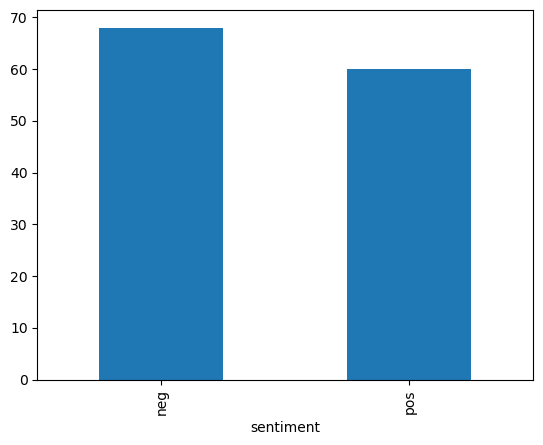

In [7]:
df['sentiment'].value_counts().plot.bar()


In [9]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['แต่นั้น',
 'แสดงว่า',
 'ตลอดทั้ง',
 'ภายภาค',
 'ทั้งเป็น',
 'ช่วงต่อไป',
 'ไม่เป็นไร',
 'ตลอดระยะเวลา',
 'ยืนยาว',
 'จนขณะนี้',
 'ยาว',
 'พบว่า',
 'ยิ่งจะ',
 'เหตุนี้',
 'กันดีไหม',
 'พอจะ',
 'ปัจจุบัน',
 'ถึงแม้จะ',
 'ยังจะ',
 'ใหญ่โต',
 'เห็นว่า',
 'เชื่อว่า',
 'วันไหน',
 'ซะจน',
 'เริ่ม',
 'ช้าๆ',
 'แม้แต่',
 'แรก',
 'แต่ไร',
 'ครั้งหลัง',
 'จับ',
 'รับรอง',
 'ก็ตามแต่',
 'ขณะ',
 'เหลือเกิน',
 'ถึงบัดนั้น',
 'ภายใน',
 'จนบัดนี้',
 'คุณ',
 'พอที',
 'คล้ายว่า',
 'หลังจาก',
 'เต็มไปด้วย',
 'เรื่อยๆ',
 'แม้ว่า',
 'เช่นที่',
 'ใคร',
 'ทั้งนี้',
 'หากแม้นว่า',
 'ประมาณ',
 'น่า',
 'อยาก',
 'ด้วยเหตุนั้น',
 'แต่อย่างใด',
 'อันละ',
 'เช่นดังที่',
 'ด้วยเหตุนี้',
 'บางที',
 'นั้น',
 'ครั้งคราว',
 'เช่นเมื่อ',
 'อันที่จริง',
 'ตรง',
 'ภายภาคหน้า',
 'อย่างๆ',
 'เสมือนกับ',
 'การ',
 'ดังกับ',
 'มา',
 'จำเป็น',
 'นำมา',
 'สิ่งนี้',
 'แยะๆ',
 'จังๆ',
 'บางที่',
 'ผิดๆ',
 'เมื่อครั้ง',
 'เมื่อเช้า',
 'ทํา',
 'ขณะที่',
 'ขณะนั้น',
 'กว้าง',
 'เมื่อ',
 'ทุกที',
 'ทั้งที่',
 'ต่างก็',
 'ช้านาน',
 'ซ

In [15]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


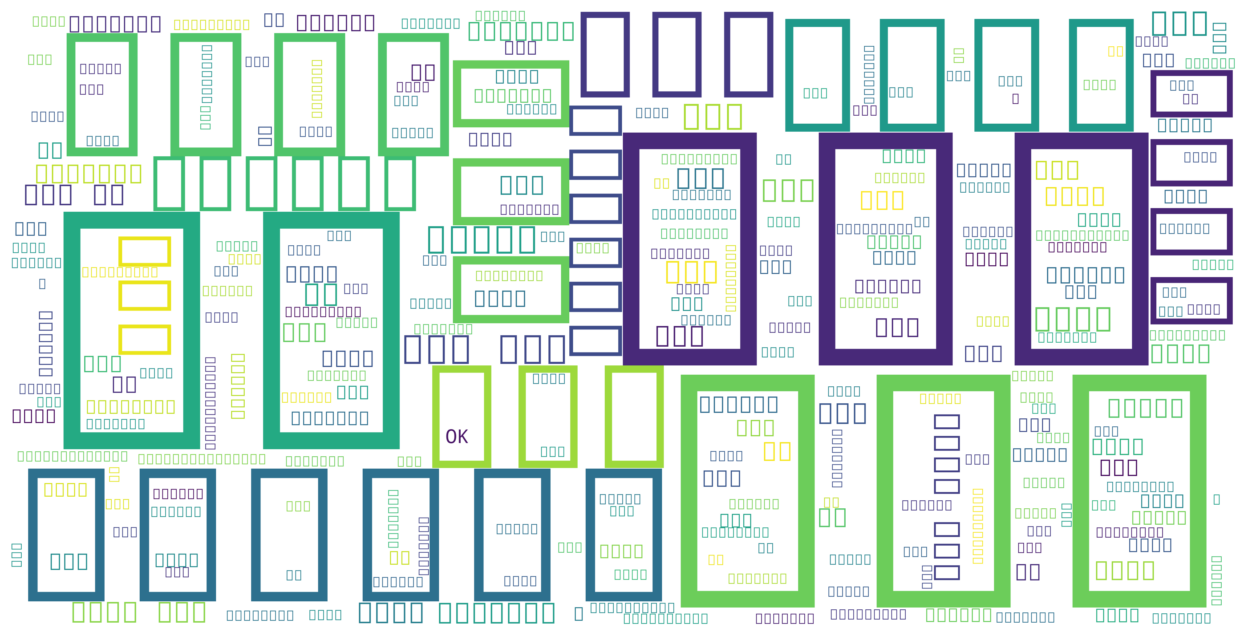

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# สร้าง WordCloud object
wordcloud = WordCloud(stopwords=None, background_color='white', max_words=2000, height=2000, width=4000, regexp=reg).generate(pos_word_all)

# แสดง WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [25]:
print(wordcloud)

In [26]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in neg_pos['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'neg_pos' is not defined

In [28]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'แย่มาก': 337,
 'บิด': 146,
 'น้ำ': 139,
 'ไม่': 367,
 'แห้ง': 341,
 'เสียดาย': 304,
 'ตัง': 99,
 'มาก': 171,
 'อย่า': 257,
 'ทำ': 117,
 'แบบนี้': 329,
 'กับ': 9,
 'ใคร': 349,
 'อีก': 265,
 'นะ': 130,
 'ค่ะ': 59,
 'รับ': 193,
 'ของ': 24,
 'ไว': 370,
 'พนักงาน': 157,
 'ส่ง': 240,
 'ดีมาก': 87,
 'คุณภาพ': 54,
 'คุ้ม': 55,
 'ราคา': 197,
 'ซื้อ': 83,
 'แล้ว': 340,
 'ผิดหวัง': 153,
 'สินค้า': 234,
 'มี': 173,
 'สิน': 233,
 'ค้าส่ง': 61,
 'มา': 170,
 'แตกหัก': 322,
 'ยัง': 179,
 'ได้': 362,
 'ประกอบ': 150,
 'เลย': 299,
 'เสียความรู้สึก': 302,
 'วัสดุ': 215,
 'เหมือน': 312,
 'หมดอายุ': 247,
 'ของปลอม': 26,
 'เนื่อ': 286,
 'ครีม': 40,
 'ซอง': 80,
 '10': 0,
 'บาท': 145,
 'บรรจุภัณฑ์': 140,
 'ก๊อ': 22,
 'ป': 148,
 'ของจริง': 25,
 'ใน': 357,
 'ห้าง': 254,
 'ตังค์': 100,
 'ทิ้ง': 122,
 'สวย': 223,
 'ใช้งาน': 353,
 'ง่าย': 63,
 'ที่': 123,
 'สำคัญ': 232,
 'เร็ว': 298,
 'คะ': 45,
 'แพ๊': 335,
 'คดี': 36,
 'สภาพ': 219,
 'ดี': 85,
 'ถูก': 112,
 'ไม่ต้อง': 369,
 'ไป': 366,
 'เดิน': 278,
 'ช๊อป': 79,
 

In [31]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])


,10,OK,ก,กก,กด,กระทะ,กลิ่น,กล่อง,กว่า,กับ,...,ไม่ต้อง,ไว,ไว้,ไว้ใจ,ไหนจะ,ไหม้,ไหล,ไหว,☺,😢
text_tokens,,,,,,,,,,,,,,,,,,,,,
แย่มาก บิด น้ำ ไม่ แห้ง เสียดาย ตัง มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
รับ ของ ไว พนักงาน ส่ง ของ ดีมาก คุณภาพ คุ้ม ราคา,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สิน ค้าส่ง มา แตกหัก ยัง ไม่ ได้ ประกอบ เลย เสียความรู้สึก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แย่มาก เสียดาย เงิน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า ใช้ ดี สีสด ใช้ จนถึง ทุกวันนี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แพ็ค ของ ไม่ ดีมาก เลย ครับ ข้างใน กล่อง ฉีกขาด ไม่ สวย เลย,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.96      0.92      0.94        24
         pos       0.88      0.93      0.90        15

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.93      0.92      0.92        39



In [34]:
my_text = 'ตรงปกส่งไวครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)

In [38]:
my_text = 'ไม่ตรงปกส่งช้าครับ'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)